In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("seed.csv")
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


#### Here the Target variable is Grain_Variety. We need to find the type of grain

## Identification of Variables

In [62]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length', 'grain_variety'],
      dtype='object')

In [99]:
df.shape

(210, 8)

In [63]:
df.dtypes

area                     float64
perimeter                float64
compactness              float64
length                   float64
width                    float64
asymmetry_coefficient    float64
groove_length            float64
grain_variety             object
dtype: object

In [122]:
df['grain_variety'].unique()

array(['Kama wheat', 'Rosa wheat', 'Canadian wheat'], dtype=object)

### Here we cannot find some parameters which can be judged to be removed by their name. 
##### Ex: Name of a Person in some scenario


### Identifying Missing values

In [64]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
grain_variety            0
dtype: int64

There are no missing values. So we need not think of replacing the missing values with another set of values.

### Univariate Analysis

#### Here we find all the features to be continuous. Hence we use box plot to analyse the data to detect outliers

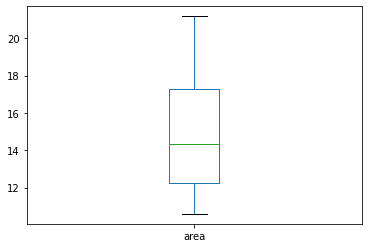

In [65]:
df["area"].plot(kind='box')

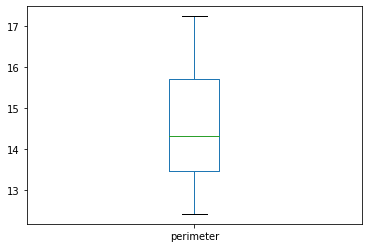

In [66]:
df["perimeter"].plot(kind='box')

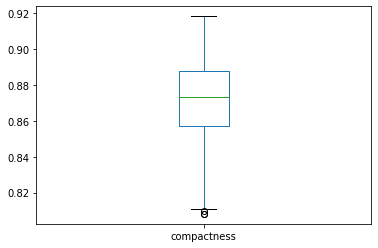

In [67]:
df["compactness"].plot(kind='box')

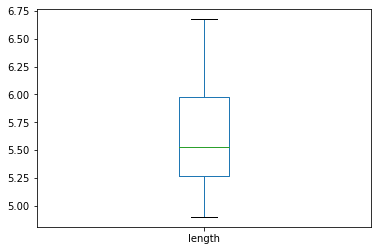

In [68]:
df["length"].plot(kind='box')

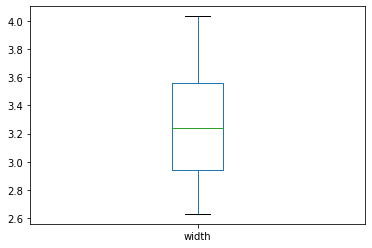

In [69]:
df["width"].plot(kind='box')

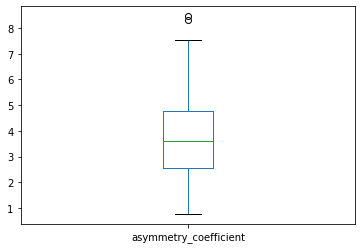

In [70]:
df["asymmetry_coefficient"].plot(kind='box')

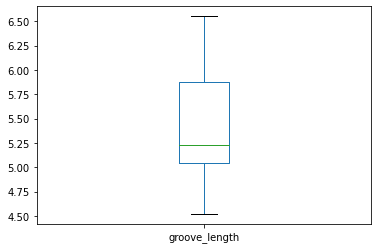

In [71]:
df["groove_length"].plot(kind='box')

#### From the above analysis we find the features 'compactness' and 'asymmetry_coefficient' had outliers in it

### Bivariate Analysis

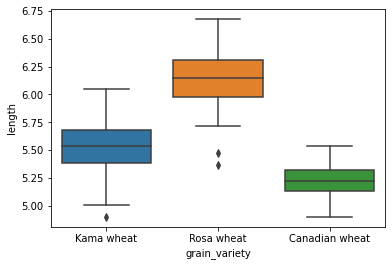

In [72]:
sns.boxplot(x='grain_variety',y='length',data=df)

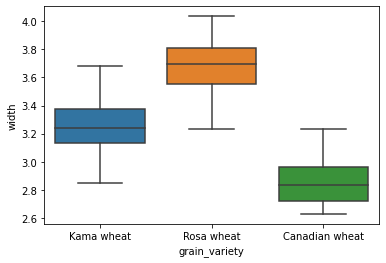

In [73]:
sns.boxplot(x='grain_variety',y='width',data=df)

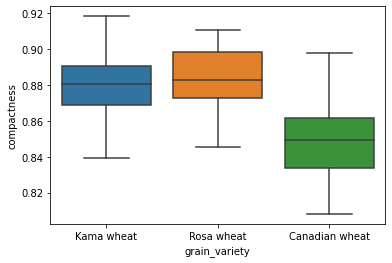

In [74]:
sns.boxplot(x='grain_variety',y='compactness',data=df)

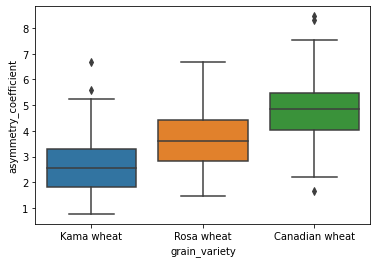

In [75]:
sns.boxplot(x='grain_variety',y='asymmetry_coefficient',data=df)

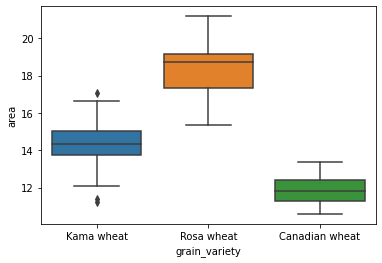

In [76]:
sns.boxplot(x='grain_variety',y='area',data=df)

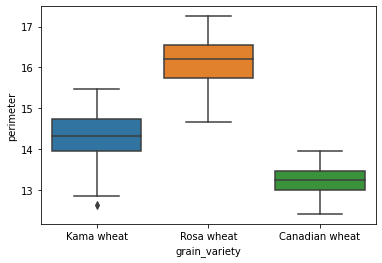

In [77]:
sns.boxplot(x='grain_variety',y='perimeter',data=df)

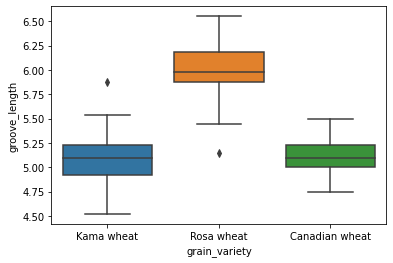

In [78]:
sns.boxplot(x='grain_variety',y='groove_length',data=df)

## Getting rid of Outliers

In [79]:
IQR_ac = df['asymmetry_coefficient'].quantile(0.75)-df['asymmetry_coefficient'].quantile(0.25)
UpperLimit=df['asymmetry_coefficient'].quantile(0.75)+1.5*IQR_ac
LowerLimit=df['asymmetry_coefficient'].quantile(0.25)-1.5*IQR_ac
UpperLimit,LowerLimit

(8.079625, -0.7493750000000006)

In [80]:
outliers_1 = df[(df['asymmetry_coefficient']>=UpperLimit)|(df['asymmetry_coefficient']<=LowerLimit)]

In [81]:
outliers_1

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
203,12.7,13.41,0.8874,5.183,3.091,8.456,5.000,Canadian wheat
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian wheat


In [82]:
index_1=list(outliers_1.index)
print(index_1)

[203, 207]


In [83]:
for ind in index_1:
    df['asymmetry_coefficient'][ind]=df['asymmetry_coefficient'].quantile(0.75)

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


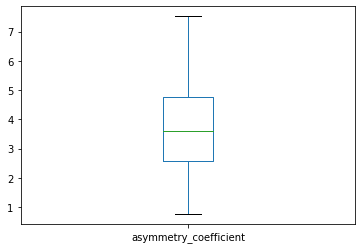

In [84]:
df["asymmetry_coefficient"].plot(kind='box')

In [85]:
IQR_co = df['compactness'].quantile(0.75)-df['compactness'].quantile(0.25)
ULimit=df['compactness'].quantile(0.75)+1.5*IQR_co
LLimit=df['compactness'].quantile(0.25)-1.5*IQR_co
ULimit,LowerLimit

(0.9340875, -0.7493750000000006)

In [86]:
outliers_2 = df[(df['compactness']>=ULimit)|(df['compactness']<=LLimit)]

In [87]:
outliers_2

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220,Canadian wheat
158,11.75,13.52,0.8082,5.444,2.678,4.378,5.310,Canadian wheat
174,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,Canadian wheat


In [88]:
index_2=list(outliers_2.index)
print(index_2)

[157, 158, 174]


In [92]:
for ind_ in index_2:
    df['compactness'][ind_]=df['compactness'].quantile(0.25)

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


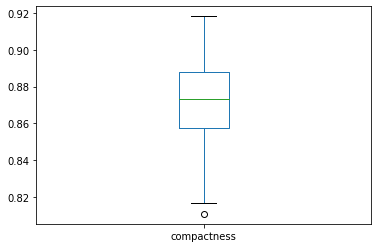

In [93]:
df['compactness'].plot(kind='box')

### Creating NumPy Matrices of Features and Target  variable

In [94]:
X = df.iloc[:,:-1].values

In [95]:
Y = df.iloc[:,-1].values

In [96]:
X

array([[15.26     , 14.84     ,  0.871    , ...,  3.312    ,  2.221    ,
         5.22     ],
       [14.88     , 14.57     ,  0.8811   , ...,  3.333    ,  1.018    ,
         4.956    ],
       [14.29     , 14.09     ,  0.905    , ...,  3.337    ,  2.699    ,
         4.825    ],
       ...,
       [13.2      , 13.66     ,  0.8883   , ...,  3.232    ,  4.7655625,
         5.056    ],
       [11.84     , 13.21     ,  0.8521   , ...,  2.836    ,  3.598    ,
         5.044    ],
       [12.3      , 13.34     ,  0.8684   , ...,  2.974    ,  5.637    ,
         5.063    ]])

In [97]:
Y

array(['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama 

## Splitting Dataset into train and test sets

In [98]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=40)

In [107]:
X_train.shape

(157, 7)

In [108]:
Y_train.shape

(157,)

In [109]:
X_test.shape

(53, 7)

In [110]:
Y_test.shape

(53,)

In [113]:
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

## Standard Scaling

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc = StandardScaler()

In [114]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
X_train

array([[-0.97467242, -0.8907399 , -1.37858368, ..., -1.18186487,
        -0.02152439, -0.17130038],
       [-1.29941334, -1.38142819, -0.63213017, ..., -1.2260994 ,
         2.7621621 , -0.9475048 ],
       [-1.29941334, -1.33469597, -1.04243243, ..., -1.29798051,
         0.47059929, -0.85378983],
       ...,
       [-0.99232138, -1.12440099,  0.35160657, ..., -0.89434044,
        -1.050901  , -0.74581389],
       [-0.28283306, -0.3844742 ,  0.93492786, ...,  0.10370109,
        -0.69344872, -0.85990168],
       [ 0.95965394,  1.07980198, -0.24160152, ...,  0.8197475 ,
         0.29223131,  1.2996172 ]])

In [120]:
X_test

array([[ 2.43106036e-01,  4.02184814e-01, -7.01337784e-01,
         4.14930386e-01,  5.94665604e-02, -6.75540289e-01,
         6.72134353e-01],
       [-9.49963870e-01, -9.91993035e-01, -3.45412931e-01,
        -9.52687959e-01, -8.22459334e-01,  1.29008908e+00,
        -4.09662365e-01],
       [ 4.26655252e-01,  3.16509080e-01,  1.37489052e+00,
         1.38257595e-01,  6.09633497e-01, -1.00147373e+00,
         4.26142289e-02],
       [-8.72308433e-01, -7.81698053e-01, -1.28465907e+00,
        -7.38997593e-01, -1.01598539e+00,  8.99685290e-01,
        -3.09835549e-01],
       [-1.45472422e+00, -1.29575246e+00, -3.03956633e+00,
        -7.43496337e-01, -1.70438523e+00,  1.28507472e+00,
        -4.64668978e-01],
       [-8.54659470e-01, -8.82951192e-01, -3.15752527e-01,
        -8.55964951e-01, -8.22459334e-01,  5.39367661e-01,
        -8.55827114e-01],
       [ 1.50677179e+00,  1.58606768e+00, -2.40918834e-02,
         1.62284330e+00,  1.15150646e+00, -2.22815157e-01,
         1.6439178

## Building ML Model using KNN classifier.

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [124]:
classifier.fit(X_train,Y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
Y_pred = classifier.predict(X_test)

In [126]:
Y_pred

array(['Kama wheat', 'Canadian wheat', 'Kama wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Rosa wheat', 'Kama wheat',
       'Canadian wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Kama wheat', 'Rosa wheat',
       'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Kama wheat',
       'Kama wheat', 'Canadian wheat', 'Kama wheat', 'Kama wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat',
       'Kama wheat', 'Canadian wheat', 'Kama wheat', 'Rosa wheat',
       'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Rosa wheat', 'Kama wheat', 'Kama wheat', 'Canadian wheat',
       'Kama wheat', 'Kama wheat', 'Canadian wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat',
       'Rosa wheat', 'Kama wheat', 'Rosa wheat', 'Canadian wheat',
       'Rosa wheat'], dtype=object)

In [128]:
Y_pred.shape

(53,)

In [129]:
Y_pred = Y_pred.reshape(-1,1)

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [130]:
cm = confusion_matrix(Y_pred,Y_test)
cm

array([[17,  2,  0],
       [ 1, 13,  2],
       [ 0,  1, 17]], dtype=int64)

In [131]:
print("Accuracy Score:",accuracy_score(Y_pred,Y_test))

Accuracy Score: 0.8867924528301887


In [132]:
Y_train_pred = classifier.predict(X_train)

In [133]:
print("Accuracy Score for Train:",accuracy_score(Y_train_pred,Y_train))

Accuracy Score for Train: 0.9490445859872612


### Report

Accuracy for Train set  94%
<br>
Accuracy fro Test set  88%